<a href="https://www.kaggle.com/code/risakashiwabara/eda-moving-average?scriptVersionId=239086806" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<p><center style="color:Black; font-family:Cormorant Garamond; font-size:30px;">❤︎Thanks for visiting my notebook❤︎</center></p>

![](https://i.postimg.cc/yYhCBcgd/Firefly-33719.jpg)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<a id="1"></a>
# <p style="background-image: url(https://i.postimg.cc/vmDDpnSF/publicdomainq-0076134.jpg);font-family:Hiragino Sans;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px"> Sample data acquisition</p>

In [2]:
data_death = pd.read_csv('/kaggle/input/pcr-japandata/death_total.csv')
data_death.head(3)

,year,number of people
0,2020/2/14,1
1,2020/2/15,1
2,2020/2/16,1


In [3]:
data_pcr = pd.read_csv('/kaggle/input/pcr-japandata/pcr_positive_daily .csv')
data = data_pcr['number of people'].astype('int')
data_pcr.head(3)

,year,number of people
0,2020/1/16,1
1,2020/1/17,0
2,2020/1/18,0


In [4]:
df_detail = pd.read_csv('/kaggle/input/taiwan-earthquake-dataset/earthquake detail.csv')
df_detail.head(3)

,date,time,lat,lon,depth,ML,nstn,dmin,gap,trms,ERH,ERZ,fixed,nph,quality
0,1973-01-02,04:53:55.80,22.83,120.6700,15.0,2.88,6,41.0,153.0,0.19,1.3,6.2,N,6.0,C
1,1973-01-02,17:03:49.00,23.27,120.5817,1.0,2.99,4,34.0,149.0,0.05,0.0,0.0,N,4.0,C
2,1973-01-03,08:36:36.60,23.14,120.6150,10.0,4.10,5,49.0,138.0,0.24,3.3,4.1,N,5.0,D


In [5]:
df = pd.read_csv('/kaggle/input/disney-movies-dataset/disney movie total gross.csv')
df['Date Released'] = pd.to_datetime(df['Date Released'], format='%d/%m/%Y')
df.head(3)

,Movie Title,Date Released,Genre,MPAA Rating,Total Gross,Inflation Adjusted Gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808


<a id="1"></a>
# <p style="background-image: url(https://i.postimg.cc/vmDDpnSF/publicdomainq-0076134.jpg);font-family:Hiragino Sans;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px"> line graph : lineplot()　</p>



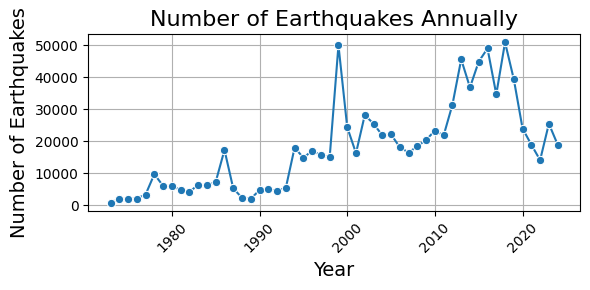

In [6]:
df_detail['date'] = pd.to_datetime(df_detail['date'], errors='coerce')

df_detail = df_detail.dropna(subset=['date'])

aa = df_detail['date'].dt.year.value_counts().sort_index().to_frame() 
aa.columns = ['Number of Earthquakes'] 

plt.figure(figsize=(6, 3))
sns.lineplot(data=aa, x=aa.index, y='Number of Earthquakes', marker='o')

plt.title('Number of Earthquakes Annually', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Earthquakes', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45)  

plt.tight_layout()
plt.show()

<a id="1"></a>
# <p style="background-image: url(https://i.postimg.cc/vmDDpnSF/publicdomainq-0076134.jpg);font-family:Hiragino Sans;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px"> line graph </p>


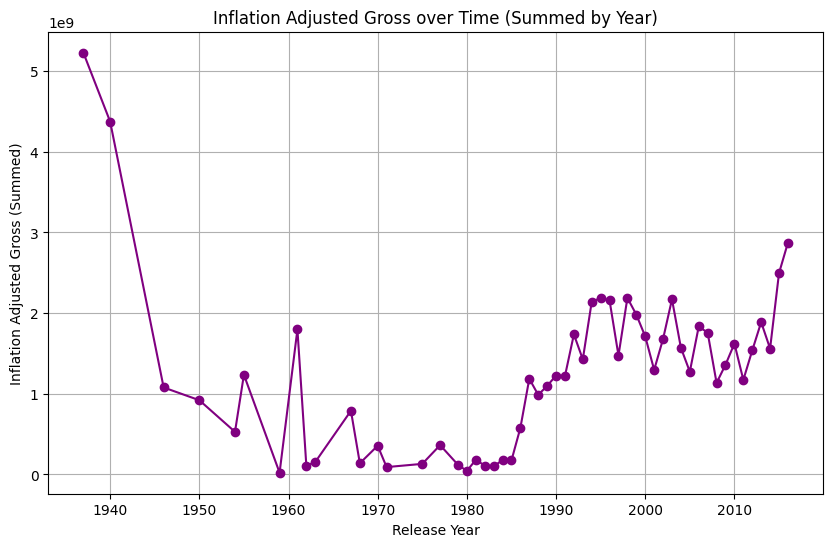

In [7]:
df['Release Year'] = df['Date Released'].dt.year
grouped_df = df.groupby('Release Year')['Inflation Adjusted Gross'].sum().reset_index()
plt.figure(figsize=(10,6))
plt.plot(grouped_df['Release Year'], grouped_df['Inflation Adjusted Gross'], color='purple', marker='o')
plt.title('Inflation Adjusted Gross over Time (Summed by Year)')
plt.xlabel('Release Year')
plt.ylabel('Inflation Adjusted Gross (Summed)')
plt.grid(True)
plt.show()

<a id="1"></a>
# <p style="background-image: url(https://i.postimg.cc/vmDDpnSF/publicdomainq-0076134.jpg);font-family:Hiragino Sans;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px"> bar graph</p>

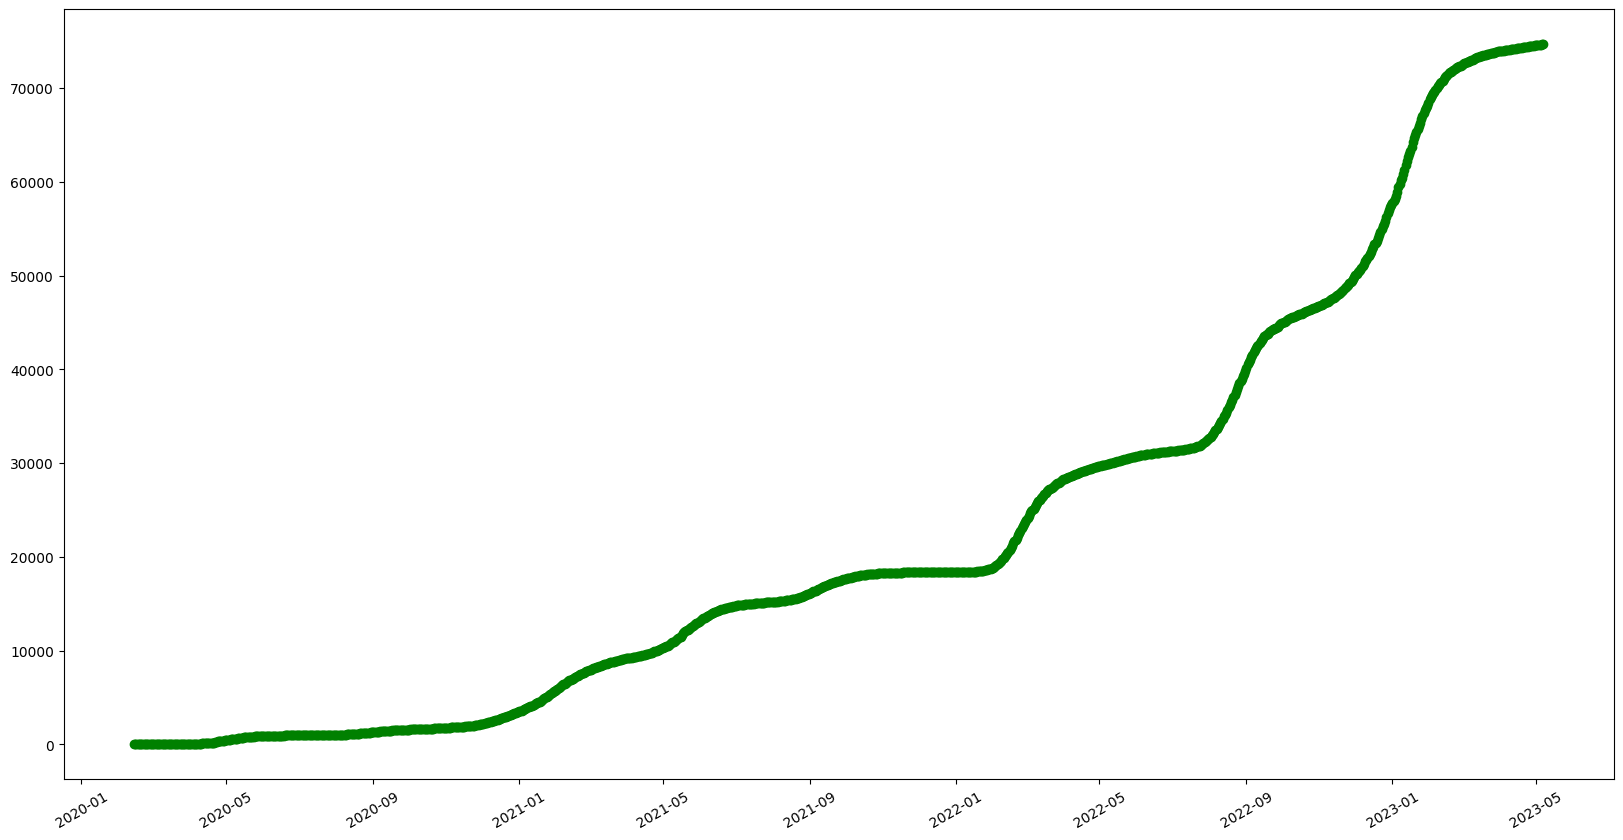

In [8]:
X_dt = pd.to_datetime(data_death['year'])
Y = data_death.iloc[:, 1] 
plt.figure(figsize=(20,10)) 
plt.xticks(rotation=30) 
plt.plot(X_dt, Y,marker='o',color="g")

<a id="1"></a>
# <p style="background-image: url(https://i.postimg.cc/vmDDpnSF/publicdomainq-0076134.jpg);font-family:Hiragino Sans;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px"> bar graph</p>

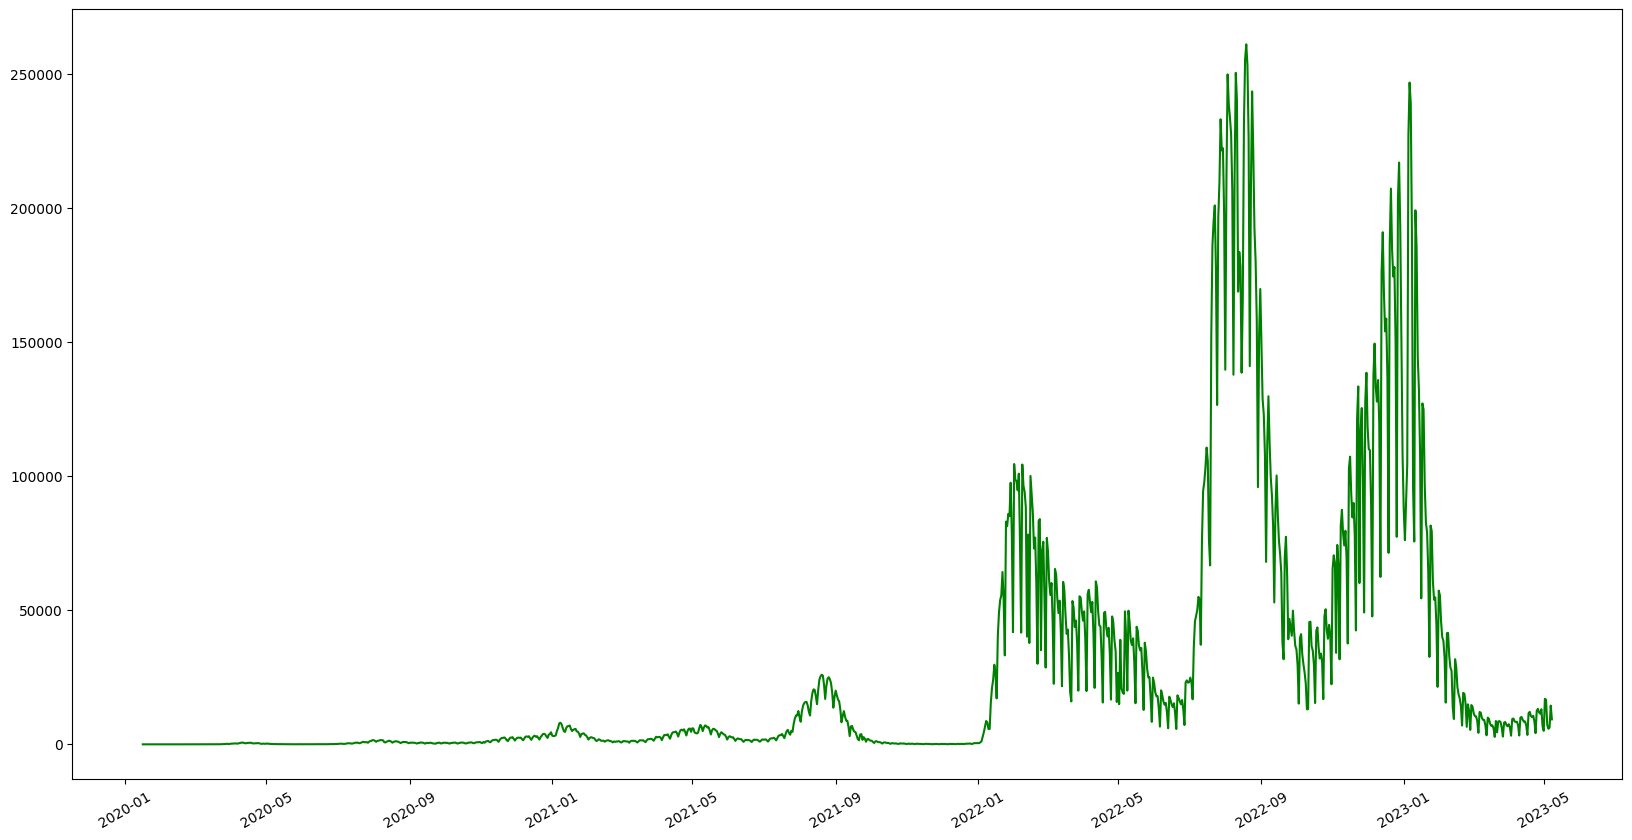

In [9]:
X_dt = pd.to_datetime(data_pcr['year'])
Y = data_pcr.iloc[:, 1] 
plt.figure(figsize=(20,10)) 
plt.xticks(rotation=30) 
plt.plot(X_dt, Y,'g')

<a id="1"></a>
# <p style="background-image: url(https://i.postimg.cc/vmDDpnSF/publicdomainq-0076134.jpg);font-family:Hiragino Sans;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px">Moving Average</p>

In [10]:
#Moving Average
num_data = np.size(data)

moving_average = np.zeros(num_data)

k = 5

for n in range(num_data):
  if n - k < 0:
    moving_average[n] = np.mean(data[:n+k+1])
  elif n + k >= num_data:
    moving_average[n] = np.mean(data[n-k:])
  else:
    moving_average[n] = np.mean(data[n-k : n+k+1])

<a id="1"></a>
# <p style="background-image: url(https://i.postimg.cc/vmDDpnSF/publicdomainq-0076134.jpg);font-family:Hiragino Sans;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px"> -mix-</p>

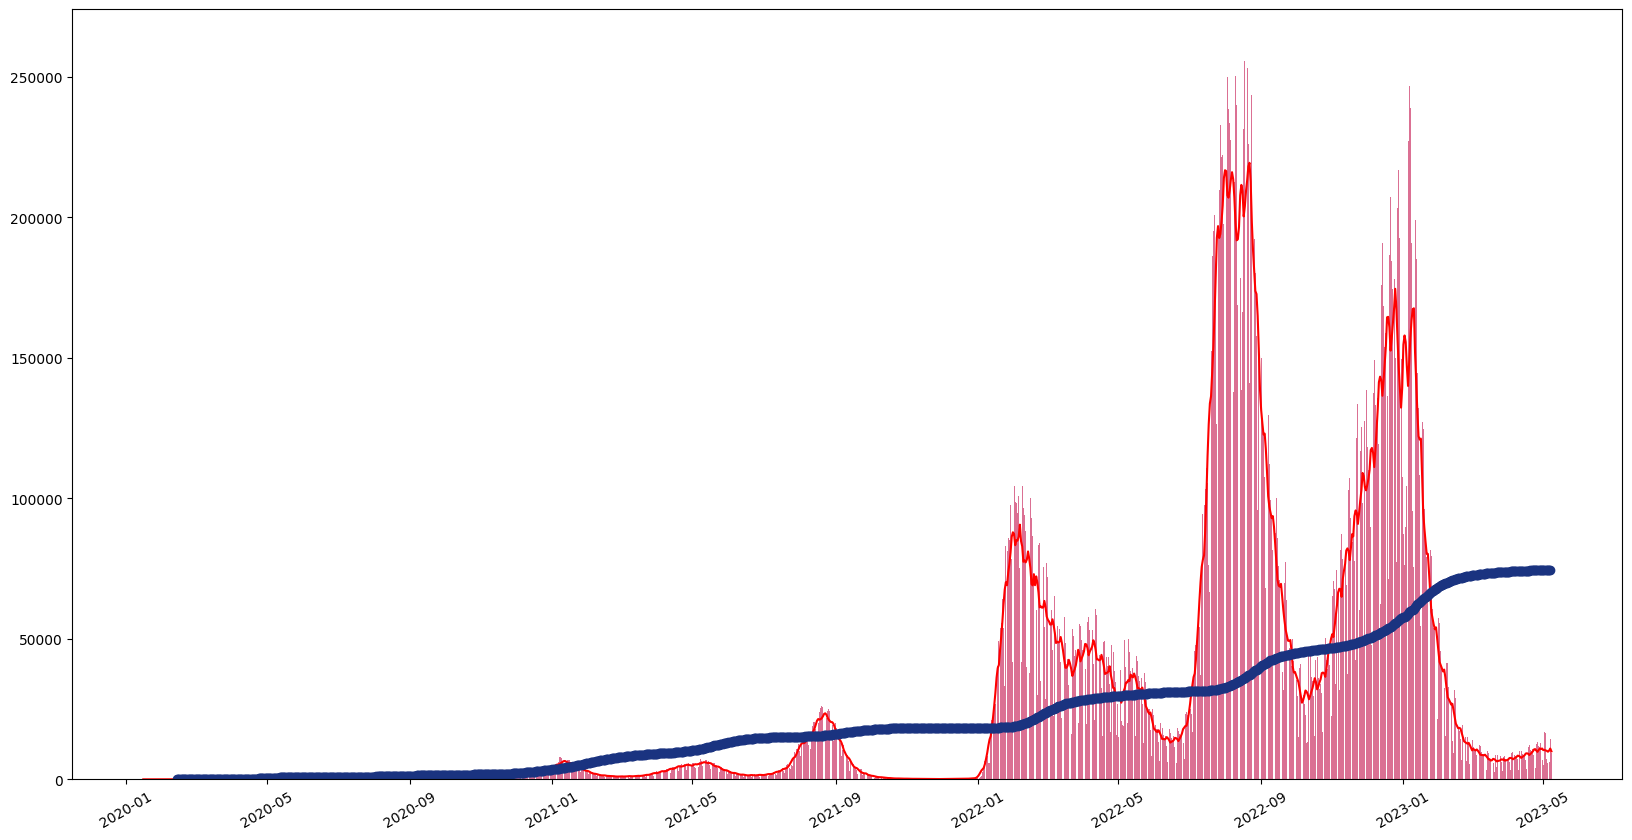

In [11]:
X_1 = pd.to_datetime(data_pcr['year'])
Y_2 = data_pcr.iloc[:, 1] 

X_3 = pd.to_datetime(data_death['year'])
Y_4 = data_death.iloc[:, 1] 
plt.figure(figsize=(20,10)) 
plt.xticks(rotation=30) 
plt.plot(X_1, moving_average, label='Moving Average', color='r')
plt.bar(X_1, Y_2, color='#db7093')
plt.plot(X_3, Y_4, marker = 'o',color=(0.1, 0.2, 0.5))

plt.show()